In [1]:
import os

os.chdir('C:/대학원/2019-1/1.전공/2.데이터마이닝/project/도로/result')
os.getcwd()

'C:\\대학원\\2019-1\\1.전공\\2.데이터마이닝\\project\\도로\\result'

In [3]:
import pandas as pd

car_gn = pd.read_csv('car_gn.csv')

In [4]:
pd.set_option('display.max_columns', 500)
car_gn.head(5)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,time,value,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5
0,20180101,월,강남대로,1220021100,우성아파트,강남역,상행,586,5.0,주간선도로,외곽,강남구,6,26.95,0.0,0.0,60.0,82.0,54.0,3.0,69.0,338.0,28.0,438.0,1285.0,280.0,15.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0
1,20180101,월,강남대로,1220016200,우성아파트,뱅뱅사거리,하행,414,5.0,주간선도로,외곽,강남구,6,34.79,0.0,0.0,60.0,82.0,54.0,3.0,69.0,338.0,28.0,438.0,1285.0,280.0,15.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0
2,20180101,월,개포로,1220020500,대청초교,대청역,상행,862,2.0,기타도로,외곽,강남구,6,30.51,1.0,0.0,30.0,19.0,53.0,0.0,21.0,31.0,5.0,57.0,161.0,39.0,8.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0
3,20180101,월,개포로,1220018600,대청역,수서경찰서,상행,318,2.0,기타도로,외곽,강남구,6,26.00,0.0,0.0,30.0,19.0,53.0,0.0,21.0,31.0,5.0,57.0,161.0,39.0,8.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0
4,20180101,월,개포로,1220017200,수서경찰서,대모산입구역,상행,333,2.0,기타도로,외곽,강남구,6,35.89,0.0,1.0,30.0,19.0,53.0,0.0,21.0,31.0,5.0,57.0,161.0,39.0,8.0,-1.7,0.9,0.0,0.0,1,0,0,0.006,0.7,0.004,0.04,32.0,25.0


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [40]:
np.random.seed(333)

In [18]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
car_gn["direction"] = lb_make.fit_transform(car_gn["direction"])
car_gn["road_type"] = lb_make.fit_transform(car_gn["road_type"])
car_gn["urban_suburb"] = lb_make.fit_transform(car_gn["urban_suburb"])

In [89]:
cluster_car_gn = car_gn.drop_duplicates('link_id',keep='first')
cluster_car_gn = cluster_car_gn[['value','link_id','road_name','direction', 'road_length', 'road_num', 'road_type', 'urban_suburb', 'cctv', 'kids', 'speed_limit', 'entrance', 'signal']]

In [90]:
cluster_car_gn['signal_length'] = cluster_car_gn['signal']/cluster_car_gn['road_length']
cluster_car_gn['entrance_length'] = cluster_car_gn['entrance']/cluster_car_gn['road_length']

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_df = cluster_car_gn.drop(['value','road_name', 'link_id','signal','entrance'],axis=1)
scaler.fit(scale_df)
scale_df = scaler.transform(scale_df)

In [92]:
cluster_car_gn.columns

Index(['value', 'link_id', 'road_name', 'direction', 'road_length', 'road_num',
       'road_type', 'urban_suburb', 'cctv', 'kids', 'speed_limit', 'entrance',
       'signal', 'signal_length', 'entrance_length'],
      dtype='object')

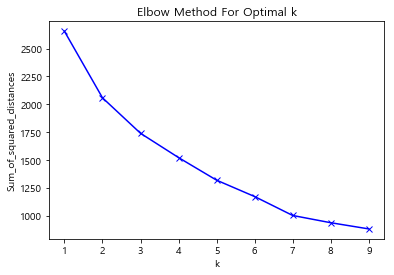

In [93]:
SSD = []
n = 10

for k in range(1,n):
    km = KMeans(n_clusters = k)
    km = km.fit(scale_df)
    SSD.append(km.inertia_)
    
plt.plot(range(1,n), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [94]:
np.random.seed(333)
k = 3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_car_gn.drop(['road_name', 'link_id'],axis=1)) 
cluster_car_gn['cluster'] = km.predict(cluster_car_gn.drop(['road_name', 'link_id'],axis=1))

In [95]:
print(cluster_car_gn.cluster.value_counts())
pd.DataFrame(cluster_car_gn.groupby(['cluster'])['value','direction', 'road_length', 'road_num', 'road_type', 'urban_suburb', 'cctv', 'kids', 'speed_limit','entrance','signal',  'entrance_length', 'signal_length'].mean())

2    151
0    130
1     14
Name: cluster, dtype: int64


,value,direction,road_length,road_num,road_type,urban_suburb,cctv,kids,speed_limit,entrance,signal,entrance_length,signal_length
cluster,,,,,,,,,,,,,
0,39.201077,0.484615,777.507692,3.553846,2.184615,0.0,1.615385,0.076923,52.692308,72.215385,59.161538,0.098871,0.081312
1,70.365000,0.500000,2380.500000,2.785714,1.857143,0.0,1.357143,0.000000,71.428571,11.571429,15.357143,0.004838,0.006430
2,33.492185,0.509934,431.622517,3.211921,1.900662,0.0,0.788079,0.125828,49.668874,60.807947,49.390728,0.145462,0.121549


In [96]:
np.random.seed(333)
k = 3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(scale_df) 
cluster_car_gn['cluster'] = km.predict(scale_df)

In [97]:
print(cluster_car_gn.cluster.value_counts())
pd.DataFrame(cluster_car_gn.groupby(['cluster'])['value','direction', 'road_length', 'road_num', 'road_type', 'urban_suburb', 'cctv', 'kids', 'speed_limit','entrance','signal', 'entrance_length', 'signal_length'].mean())

2    127
0     87
1     81
Name: cluster, dtype: int64


,value,direction,road_length,road_num,road_type,urban_suburb,cctv,kids,speed_limit,entrance,signal,entrance_length,signal_length
cluster,,,,,,,,,,,,,
0,45.551379,0.471264,1021.701149,3.908046,2.275862,0.0,2.298851,0.000000,63.218391,37.206897,33.747126,0.051017,0.045272
1,30.911111,0.493827,534.493827,2.098765,0.567901,0.0,0.913580,0.320988,32.592593,43.345679,47.444444,0.086768,0.097845
2,36.785827,0.519685,530.677165,3.748031,2.779528,0.0,0.582677,0.023622,56.771654,94.362205,67.598425,0.184402,0.135042


In [98]:
cluster_car_gn.head(20)

,value,link_id,road_name,direction,road_length,road_num,road_type,urban_suburb,cctv,kids,speed_limit,entrance,signal,signal_length,entrance_length,cluster
0,26.95,1220021100,강남대로,0,586,5.0,3,0,0.0,0.0,60.0,82.0,54.0,0.092150,0.139932,2
1,34.79,1220016200,강남대로,1,414,5.0,3,0,0.0,0.0,60.0,82.0,54.0,0.130435,0.198068,2
2,30.51,1220020500,개포로,0,862,2.0,0,0,1.0,0.0,30.0,19.0,53.0,0.061485,0.022042,1
3,26.00,1220018600,개포로,0,318,2.0,0,0,0.0,0.0,30.0,19.0,53.0,0.166667,0.059748,1
4,35.89,1220017200,개포로,0,333,2.0,0,0,0.0,1.0,30.0,19.0,53.0,0.159159,0.057057,1
5,40.92,1220015600,개포로,0,388,2.0,0,0,0.0,1.0,30.0,19.0,53.0,0.136598,0.048969,1
6,15.55,1220013600,개포로,0,270,2.0,0,0,1.0,1.0,30.0,19.0,53.0,0.196296,0.070370,1
7,27.81,1220012000,개포로,0,889,2.0,0,0,2.0,1.0,30.0,19.0,53.0,0.059618,0.021372,1
8,31.21,1220008200,개포로,0,558,2.0,0,0,0.0,1.0,30.0,19.0,53.0,0.094982,0.034050,1
9,35.06,1220007000,개포로,0,888,2.0,0,0,0.0,1.0,30.0,19.0,53.0,0.059685,0.021396,1


In [99]:
cluster_car_gn.to_csv("cluster3_car_gn.csv",index=False)

In [100]:
np.random.seed(333)
k = 4
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(scale_df) 
cluster_car_gn['cluster'] = km.predict(scale_df)

In [101]:
print(cluster_car_gn.cluster.value_counts())
pd.DataFrame(cluster_car_gn.groupby(['cluster'])['value','direction', 'road_length', 'road_num', 'road_type', 'urban_suburb', 'cctv', 'kids', 'speed_limit','entrance','signal', 'entrance_length', 'signal_length'].mean())

2    120
0     87
1     59
3     29
Name: cluster, dtype: int64


,value,direction,road_length,road_num,road_type,urban_suburb,cctv,kids,speed_limit,entrance,signal,entrance_length,signal_length
cluster,,,,,,,,,,,,,
0,45.551379,0.471264,1021.701149,3.908046,2.275862,0.0,2.298851,0.0,63.218391,37.206897,33.747126,0.051017,0.045272
1,31.190678,0.525424,523.525424,2.152542,0.779661,0.0,0.881356,0.0,33.389831,49.694915,50.169492,0.097205,0.100756
2,36.996583,0.525000,538.375000,3.816667,2.816667,0.0,0.608333,0.0,57.250000,96.241667,68.300000,0.185667,0.134320
3,30.888276,0.413793,524.034483,2.103448,0.517241,0.0,0.793103,1.0,34.827586,34.965517,43.862069,0.083865,0.103887


In [102]:
cluster_car_gn.head(20)

,value,link_id,road_name,direction,road_length,road_num,road_type,urban_suburb,cctv,kids,speed_limit,entrance,signal,signal_length,entrance_length,cluster
0,26.95,1220021100,강남대로,0,586,5.0,3,0,0.0,0.0,60.0,82.0,54.0,0.092150,0.139932,2
1,34.79,1220016200,강남대로,1,414,5.0,3,0,0.0,0.0,60.0,82.0,54.0,0.130435,0.198068,2
2,30.51,1220020500,개포로,0,862,2.0,0,0,1.0,0.0,30.0,19.0,53.0,0.061485,0.022042,1
3,26.00,1220018600,개포로,0,318,2.0,0,0,0.0,0.0,30.0,19.0,53.0,0.166667,0.059748,1
4,35.89,1220017200,개포로,0,333,2.0,0,0,0.0,1.0,30.0,19.0,53.0,0.159159,0.057057,3
5,40.92,1220015600,개포로,0,388,2.0,0,0,0.0,1.0,30.0,19.0,53.0,0.136598,0.048969,3
6,15.55,1220013600,개포로,0,270,2.0,0,0,1.0,1.0,30.0,19.0,53.0,0.196296,0.070370,3
7,27.81,1220012000,개포로,0,889,2.0,0,0,2.0,1.0,30.0,19.0,53.0,0.059618,0.021372,3
8,31.21,1220008200,개포로,0,558,2.0,0,0,0.0,1.0,30.0,19.0,53.0,0.094982,0.034050,3
9,35.06,1220007000,개포로,0,888,2.0,0,0,0.0,1.0,30.0,19.0,53.0,0.059685,0.021396,3


In [103]:
cluster_car_gn.to_csv("cluster4_car_gn.csv",index=False)